# Modelos predictivos que apoyen la toma de decisiones para el establecimiento de planes de mitigación de incendios forestales.

## Author: David Mesa
ds.mesa10@uniandes.edu.co

# Regresión lineal

## 1. Carga, exploración y visualización de los datos. 

In [84]:
#importar librerias y data necearia
import pandas as pd
import pandas_profiling as pf
import matplotlib.pyplot as plt
import os
import numpy as np
# Librerias para aprendizaje autónomo
# Para la separación del conjunto de entrenamiento y test
from sklearn.model_selection import train_test_split
# Librería para parámetros polinomiales
from sklearn.preprocessing import PolynomialFeatures
# Para contrur un modelo de regresión lineal 
from sklearn.linear_model import LinearRegression
# Para determinar el rendimiento del modelo con MSE, MAE y R2
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
#Para sacar un reporte estadístico
import statsmodels.api as sm
data = pd.read_csv('datos_proyecto_modulo2.csv', sep=';')
data.head()

,area_quemada,clase_incendio,mes_incendio,vegetacion,Prec_pre_30,Prec_pre_15,Prec_pre_7,Prec_cont
0,3.0,B,Diciembre,Desierto polar_roca,59.8,8.4,0.0,86.8
1,60.0,C,Febrero,Bosque tropical perennifolio secundario,168.8,42.2,18.1,124.5
2,1.0,B,Junio,Bosque tropical perennifolio,10.4,7.2,0.0,0.0
3,5.2,B,Enero,Matorral abierto,26.0,0.0,0.0,0.0
4,1.0,B,Noviembre,Matorral abierto,28.4,27.5,1.2,55.4


In [85]:
data.shape

(37759, 8)

## 2. Descripción de los datos

In [86]:
#Se realiza el perfilamiento de los datos numérico
data.describe()

,area_quemada,Prec_pre_30,Prec_pre_15,Prec_pre_7,Prec_cont
count,37759.000000,37759.000000,37759.000000,37759.000000,37759.000000
mean,2344.983479,35.931177,16.127596,6.764959,21.260950
std,15512.560261,130.257343,65.928608,36.746405,69.377046
min,0.510000,0.000000,0.000000,0.000000,0.000000
25%,1.200000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,0.600000,0.000000,0.000000,0.000000
75%,20.000000,37.900000,12.300000,1.500000,3.300000
max,538049.000000,13560.800000,2527.000000,1638.000000,2126.000000


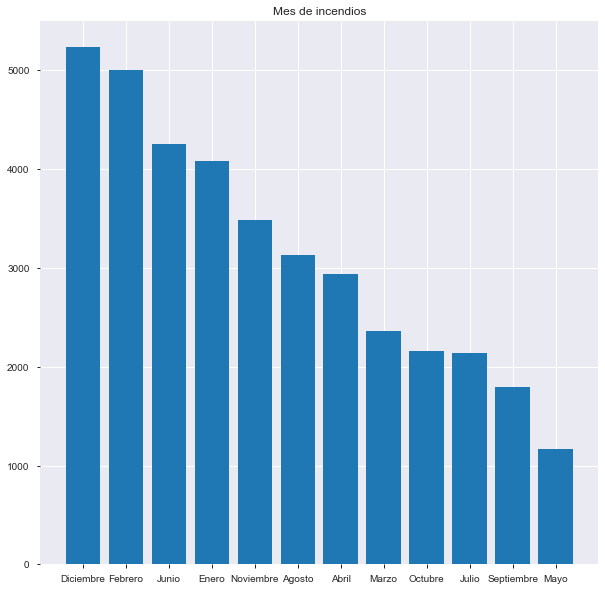

In [87]:
#Número de eventos por mes
plt.figure(figsize=(10,10))
plt.bar(data['mes_incendio'].unique(), data['mes_incendio'].value_counts())
plt.title('Mes de incendios')
plt.show()

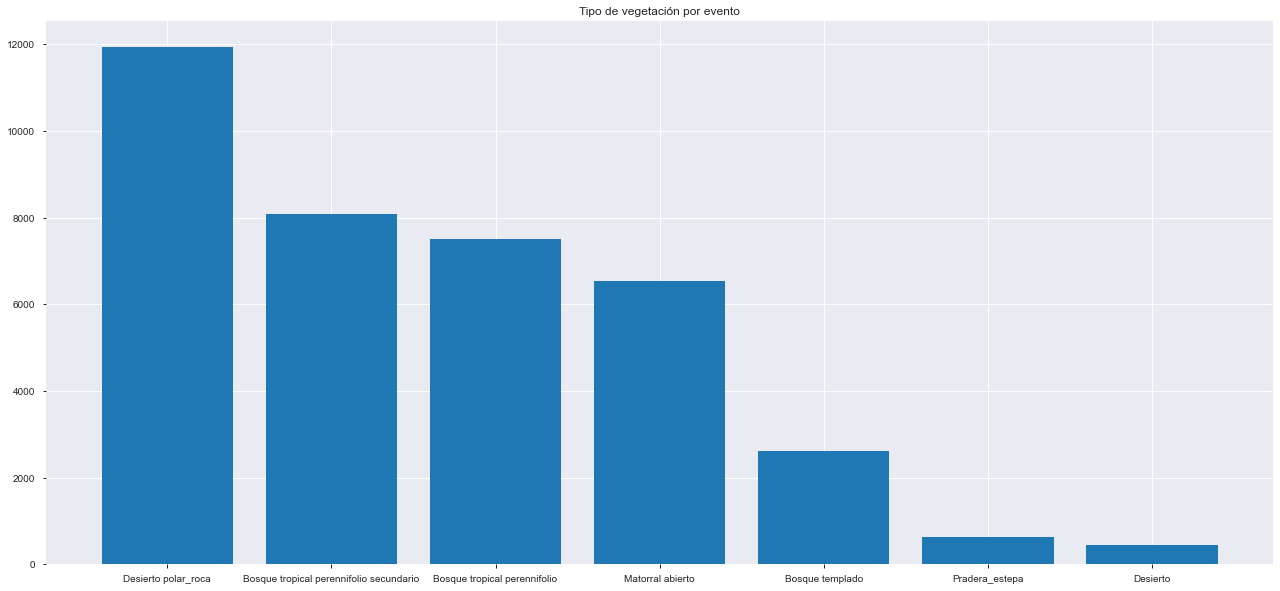

In [88]:
#Tipo de vegetación por evento
plt.figure(figsize=(22,10))
plt.bar(data['vegetacion'].unique(), data['vegetacion'].value_counts())
plt.title('Tipo de vegetación por evento')
plt.show()

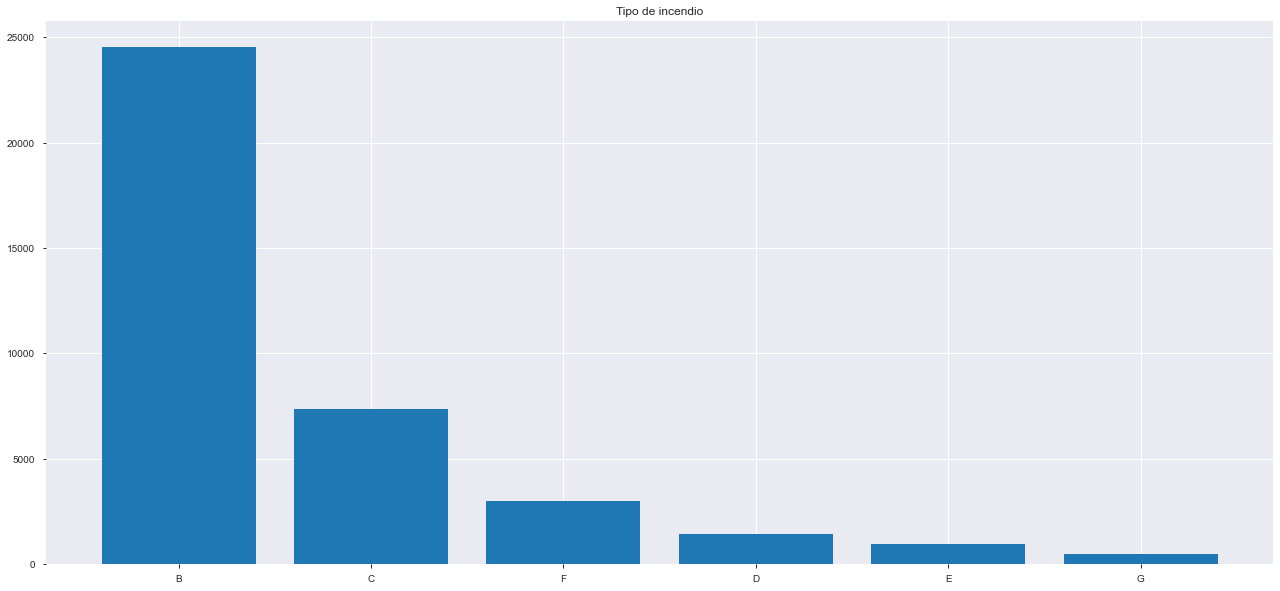

In [89]:
#Tipo de vegetación por evento
plt.figure(figsize=(22,10))
plt.bar(data['clase_incendio'].unique(), data['clase_incendio'].value_counts())
plt.title('Tipo de incendio')
plt.show()

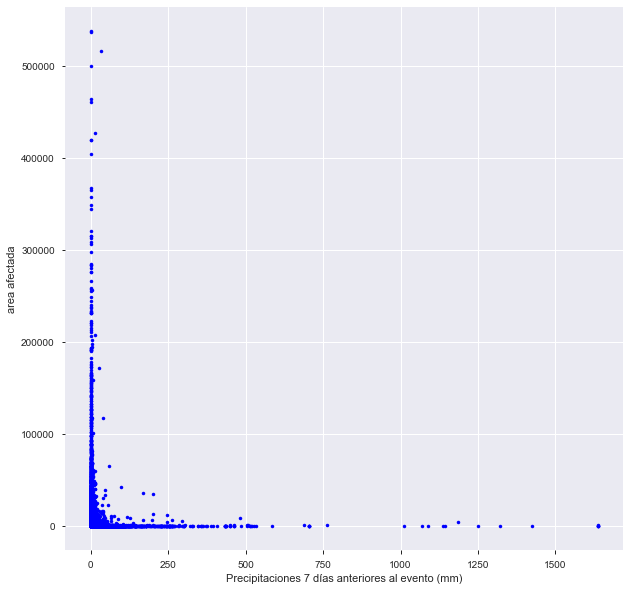

In [90]:
#Grafico de dispersión enre el área afectada y la precipitación 7 días antes
plt.figure(figsize=(10,10))
plt.plot(data['Prec_pre_7'], data['area_quemada'], '.', color='blue')
plt.xlabel('Precipitaciones 7 días anteriores al evento (mm)')
plt.ylabel('area afectada')
plt.show()

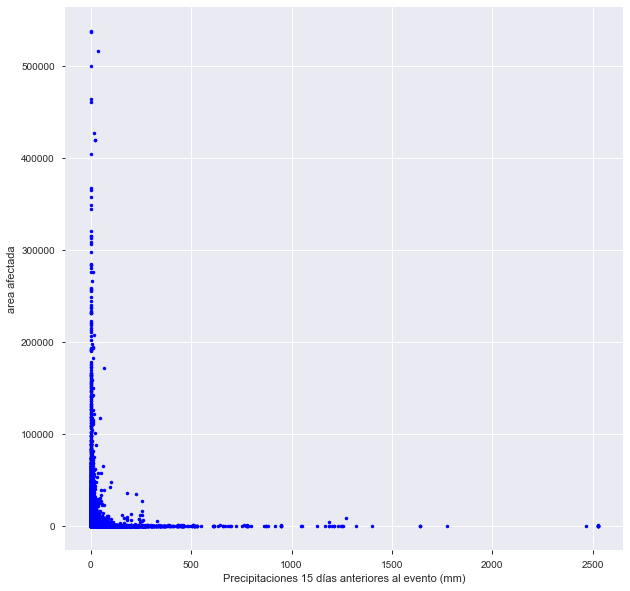

In [91]:
#Grafico de dispersión enre el área afectada y la precipitación 15 días antes
plt.figure(figsize=(10,10))
plt.plot(data['Prec_pre_15'], data['area_quemada'], '.', color='blue')
plt.xlabel('Precipitaciones 15 días anteriores al evento (mm)')
plt.ylabel('area afectada')
plt.show()

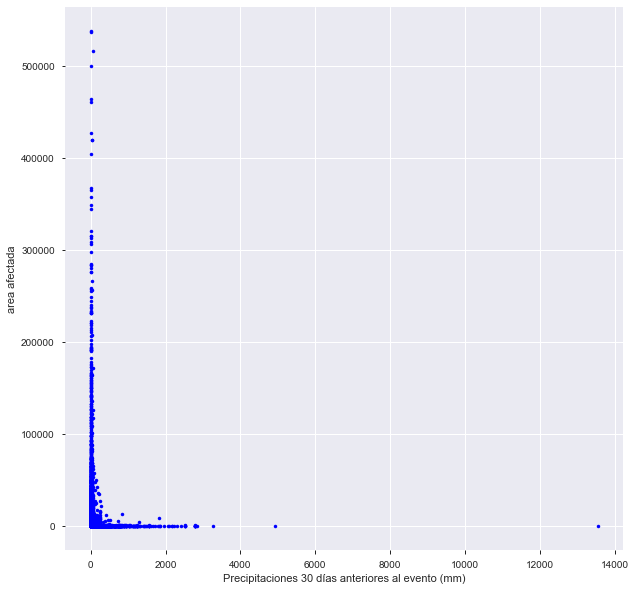

In [92]:
#Grafico de dispersión enre el área afectada y la precipitación 30 días antes
plt.figure(figsize=(10,10))
plt.plot(data['Prec_pre_30'], data['area_quemada'], '.', color='blue')
plt.xlabel('Precipitaciones 30 días anteriores al evento (mm)')
plt.ylabel('area afectada')
plt.show()

## 3. Preparación de los datos (valores repetidos y nulos)

In [93]:
#Se recomienda verificar las ausencias en otro archivo distinto
data_t = data

In [94]:
#Comprobamos las ausencias
data_t.isna().sum()/len(data_t)

area_quemada      0.0
clase_incendio    0.0
mes_incendio      0.0
vegetacion        0.0
Prec_pre_30       0.0
Prec_pre_15       0.0
Prec_pre_7        0.0
Prec_cont         0.0
dtype: float64

In [95]:
# Eliminamos los datos duplicados
data_t = data_t.drop_duplicates()

In [96]:
#Vemos que se eliminaron datos duplicados
data_t.shape

(26394, 8)

In [97]:
#Transformación de variables categoricas a Dummies
data_t=pd.get_dummies(data_t, columns=['clase_incendio', 'mes_incendio', 'vegetacion'])

In [98]:
data_t.head()

,area_quemada,Prec_pre_30,Prec_pre_15,Prec_pre_7,Prec_cont,clase_incendio_B,clase_incendio_C,clase_incendio_D,clase_incendio_E,clase_incendio_F,...,mes_incendio_Noviembre,mes_incendio_Octubre,mes_incendio_Septiembre,vegetacion_Bosque templado,vegetacion_Bosque tropical perennifolio,vegetacion_Bosque tropical perennifolio secundario,vegetacion_Desierto,vegetacion_Desierto polar_roca,vegetacion_Matorral abierto,vegetacion_Pradera_estepa
0,3.0,59.8,8.4,0.0,86.8,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,60.0,168.8,42.2,18.1,124.5,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1.0,10.4,7.2,0.0,0.0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,5.2,26.0,0.0,0.0,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1.0,28.4,27.5,1.2,55.4,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0


## 4. Construcción del modelo.

Los algoritmos supervisados implementados en scikit-learn requiere que las variables de entrada sean separadas de la variable objetivo, en nuestro caso, la variable objetivo es 'precio'.

In [290]:
y = data_t['area_quemada']
x = data_t.drop(['area_quemada'], axis=1)
x = x.drop(['vegetacion_Desierto'], axis=1)
x = x.drop(['mes_incendio_Septiembre'], axis=1)
x = x.drop(['Prec_pre_7'], axis=1)
x = x.drop(['Prec_pre_30'], axis=1)
x = x.drop(['mes_incendio_Agosto'], axis=1)
x = x.drop(['mes_incendio_Noviembre'], axis=1)
x = x.drop(['Prec_pre_15'], axis=1)
x = x.drop(['Prec_cont'], axis=1)
x = x.drop(['clase_incendio_F'], axis=1)
x = x.drop(['mes_incendio_Diciembre'], axis=1)
x = x.drop(['mes_incendio_Enero'], axis=1)
x = x.drop(['mes_incendio_Octubre'], axis=1)
x = x.drop(['mes_incendio_Marzo'], axis=1)
x = x.drop(['mes_incendio_Febrero'], axis=1)
x = x.drop(['mes_incendio_Abril'], axis=1)
x = x.drop(['mes_incendio_Julio'], axis=1)
x = x.drop(['mes_incendio_Mayo'], axis=1)

In [242]:
#Separamos los datos en un conjunto de Train Data y Test Data
X_train, X_test, Y_train, Y_test = train_test_split( x, y, test_size = 0.2, random_state=0)

In [243]:
#Cremos un objeto de la Clase LinearRegression
modelo_regresion = LinearRegression()
#Entrenamos el modelo con los datos de entrenamiento
modelo_regresion.fit(X_train, Y_train)

LinearRegression()

## 5. Evaluación del modelo.


In [244]:
#Predicciones sobre el modelo del conjunto de entrenamiento
y_pred = modelo_regresion.predict(X_train)
#Obtenemos las métricas de evaluación del modelo.
print('MSE: %.2f' % mean_squared_error(Y_train, y_pred, squared = True))
print('RMSE: %.2f' % mean_squared_error(Y_train, y_pred, squared = False))
print('MAE: %.2f' % mean_absolute_error(Y_train, y_pred))
print('R2: %.2f' % r2_score(Y_train, y_pred))

MSE: 234483629.07
RMSE: 15312.86
MAE: 3123.30
R2: 0.23


In [245]:
#Predicciones sobre el modelo del conjunto de test
y_pred = modelo_regresion.predict(X_test)
#Obtenemos las métricas de evaluación del modelo.
print('MSE: %.2f' % mean_squared_error(Y_test, y_pred, squared = True))
print('RMSE: %.2f' % mean_squared_error(Y_test, y_pred, squared = False))
print('MAE: %.2f' % mean_absolute_error(Y_test, y_pred))
print('R2: %.2f' % r2_score(Y_test, y_pred))

MSE: 297247995.37
RMSE: 17240.88
MAE: 3616.12
R2: 0.23


In [246]:
#Ajustar el modelo con los datos
modelo_regresion.fit(x,y)

LinearRegression()

In [247]:
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           area_quemada   R-squared (uncentered):                   0.254
Model:                            OLS   Adj. R-squared (uncentered):              0.253
Method:                 Least Squares   F-statistic:                              747.9
Date:                Mon, 11 Apr 2022   Prob (F-statistic):                        0.00
Time:                        17:49:43   Log-Likelihood:                     -2.9248e+05
No. Observations:               26394   AIC:                                  5.850e+05
Df Residuals:                   26382   BIC:                                  5.851e+05
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
======================================================================================================================
                                                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
clase_incendio_B                                   -2919.1185    406.130     -7.188      0.000   -3715.154   -2123.083
clase_incendio_C                                   -2971.2967    442.477     -6.715      0.000   -3838.575   -2104.018
clase_incendio_D                                   -3016.5098    657.809     -4.586      0.000   -4305.851   -1727.169
clase_incendio_E                                   -2585.7666    840.655     -3.076      0.002   -4233.495    -938.038
clase_incendio_G                                    2.423e+04    481.351     50.345      0.000    2.33e+04    2.52e+04
mes_incendio_Junio                                  2219.0508    336.439      6.596      0.000    1559.613    2878.488
vegetacion_Bosque templado                          3140.5435    746.904      4.205      0.000    1676.571    4604.516
vegetacion_Bosque tropical perennifolio             4163.0865    439.048      9.482      0.000    3302.528    5023.645
vegetacion_Bosque tropical perennifolio secundario  2616.2809    446.010      5.866      0.000    1742.076    3490.485
vegetacion_Desierto polar_roca                      2459.6710    425.340      5.783      0.000    1625.981    3293.361
vegetacion_Matorral abierto                         2653.6725    428.785      6.189      0.000    1813.231    3494.114
vegetacion_Pradera_estepa                           2533.1061    493.411      5.134      0.000    1565.993    3500.219
==============================================================================
Omnibus:                    51458.445   Durbin-Watson:                   1.834
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        132652443.135
Skew:                          15.541   Prob(JB):                         0.00
Kurtosis:                     348.911   Cond. No.                         11.9
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Regresión Polinomial

In [106]:
#Partimos de los mismos pasos anteriores, tenemos la data limpia y entendida
data_t.head()

,area_quemada,Prec_pre_30,Prec_pre_15,Prec_pre_7,Prec_cont,clase_incendio_B,clase_incendio_C,clase_incendio_D,clase_incendio_E,clase_incendio_F,...,mes_incendio_Noviembre,mes_incendio_Octubre,mes_incendio_Septiembre,vegetacion_Bosque templado,vegetacion_Bosque tropical perennifolio,vegetacion_Bosque tropical perennifolio secundario,vegetacion_Desierto,vegetacion_Desierto polar_roca,vegetacion_Matorral abierto,vegetacion_Pradera_estepa
0,3.0,59.8,8.4,0.0,86.8,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,60.0,168.8,42.2,18.1,124.5,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1.0,10.4,7.2,0.0,0.0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,5.2,26.0,0.0,0.0,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1.0,28.4,27.5,1.2,55.4,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0


In [107]:
data_t.shape

(26394, 30)

## 4. Construcción del modelo.

In [267]:
Y = data_t['area_quemada']
X = data_t.drop(['area_quemada'], axis=1)
X = X.drop(['vegetacion_Desierto'], axis=1)
X = X.drop(['mes_incendio_Septiembre'], axis=1)
X = X.drop(['Prec_pre_7'], axis=1)
X = X.drop(['Prec_pre_30'], axis=1)
X = X.drop(['mes_incendio_Agosto'], axis=1)
X = X.drop(['mes_incendio_Noviembre'], axis=1)
X = X.drop(['Prec_pre_15'], axis=1)
X = X.drop(['Prec_cont'], axis=1)
X = X.drop(['clase_incendio_F'], axis=1)
X = X.drop(['mes_incendio_Diciembre'], axis=1)
X = X.drop(['mes_incendio_Enero'], axis=1)
X = X.drop(['mes_incendio_Octubre'], axis=1)
X = X.drop(['mes_incendio_Marzo'], axis=1)
X = X.drop(['mes_incendio_Febrero'], axis=1)
X = X.drop(['mes_incendio_Abril'], axis=1)
X = X.drop(['mes_incendio_Julio'], axis=1)
X = X.drop(['mes_incendio_Mayo'], axis=1)

In [268]:
#Utilizamos una transformación de grado 2

In [291]:
poly = PolynomialFeatures(degree=2)
poly_X = poly.fit_transform(X)

In [292]:
poly_X.shape

(26394, 91)

In [293]:
poly_X_train, poly_X_test, poly_Y_train, poly_Y_test = train_test_split(poly_X, Y, test_size = 0.2, random_state = 0)

In [294]:
#Creación del modelo
modelo_regresion_poly = LinearRegression()
modelo_regresion_poly

LinearRegression()

In [295]:
#Ajuste del modelo con los datos de entrenamiento
modelo_regresion_poly.fit(poly_X_train, poly_Y_train)

LinearRegression()

## 5. Evaluación del modelo

In [296]:
Y_pred = modelo_regresion_poly.predict(poly_X_test)
#Obtenemos las métricas de evaluación del modelo.
print('MSE: %.2f' % mean_squared_error(poly_Y_test, Y_pred, squared = True))
print('RMSE: %.2f' % mean_squared_error(poly_Y_test, Y_pred, squared = False))
print('MAE: %.2f' % mean_absolute_error(poly_Y_test, Y_pred))
print('R2: %.2f' % r2_score(poly_Y_test, Y_pred))

MSE: 294372244.72
RMSE: 17157.28
MAE: 3282.06
R2: 0.24


In [297]:
#Ajustar el modelo con los datos
modelo_regresion_poly.fit(X,Y)

LinearRegression()

# Regresión Ridge

In [298]:
# Librería para comando de sistema
import os
# Librerías para manejo de datos
import pandas as pd
# Para realizar la separación del conjunto de aprendizaje en entrenamiento y test.
from sklearn.model_selection import train_test_split
# Para la creación de modelo Ridge
from sklearn.linear_model import Ridge
# Para búsqueda de hiperparámetros
from sklearn.model_selection import GridSearchCV
# Para la validación cruzada
from sklearn.model_selection import KFold 
# Para determinar el rendimiento del modelo con las métricas MSE, MAE y R2
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
data = pd.read_csv('datos_proyecto_modulo2.csv', sep=';')
data.head()

,area_quemada,clase_incendio,mes_incendio,vegetacion,Prec_pre_30,Prec_pre_15,Prec_pre_7,Prec_cont
0,3.0,B,Diciembre,Desierto polar_roca,59.8,8.4,0.0,86.8
1,60.0,C,Febrero,Bosque tropical perennifolio secundario,168.8,42.2,18.1,124.5
2,1.0,B,Junio,Bosque tropical perennifolio,10.4,7.2,0.0,0.0
3,5.2,B,Enero,Matorral abierto,26.0,0.0,0.0,0.0
4,1.0,B,Noviembre,Matorral abierto,28.4,27.5,1.2,55.4


In [299]:
# Cantidad de datos y número de variables
data.shape

(37759, 8)

In [305]:
# Es recomendable que todos los pasos de preparación se realicen sobre otro archivo.
data_t = data
# Eliminación data vacía.
data_t=data_t.dropna()
# Eliminación de registros duplicados.
data_t=data_t.drop_duplicates()
# Transformación de los datos
data_t = pd.get_dummies(data_t, columns=['mes_incendio','vegetacion', 'clase_incendio'])
# Cantidad de datos y número de variables
data_t.shape

(26394, 30)

In [306]:
# Se selecciona la variable objetivo, en este caso "area_quemada".
Y=data_t['area_quemada']
# Del conjunto de datos se elimina la variable "precio".
X=data_t.drop(['area_quemada'], axis=1)

In [307]:
# Se realiza la división entrenamiento - test. Se deja 20% de los datos para el test.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0)

In [308]:
modelo_ridge = Ridge(alpha=2, normalize = "True")
modelo_ridge

Ridge(alpha=2, normalize='True')

In [309]:
# Ajuste del modelo
modelo_ridge.fit(X_train,Y_train)

Ridge(alpha=2, normalize='True')

In [310]:
# Ahora probemos el rendimiento sobre el conjunto test.
y_pred = modelo_ridge.predict(X_test)
print("RMSE: %.2f" % mean_squared_error(Y_test, y_pred, squared=False))
print("MAE: %.2f" % mean_absolute_error(Y_test, y_pred))
print('R²: %.2f' % r2_score(Y_test, y_pred))

RMSE: 18232.31
MAE: 4066.26
R²: 0.14


In [311]:
# Fijemos el número de particiones. Utilizaremos K = 10.
particiones = KFold(n_splits=10, shuffle=True, random_state = 0)

In [312]:
# Ahora tenemos que definir el espacio de búsqueda, es decir, los valores de alpha que queremos que sean considerados. 
# Para esto se define un diccionario (o grilla) con los valores que podrá asumir el hiperparámetro alpha.
# Probemos con los siguientes valores:
param_grid = {'alpha': [0.1, 0.5, 1]}

In [313]:
# Definimos el modelo sin ningún valor del hiperparámetro alpha
modelo_ridge = Ridge(normalize = 'True')

In [314]:
# Ahora utilizamos GridSearch sobre el grid definido y con 10 particiones en la validación cruzada.
mejor_modelo = GridSearchCV(modelo_ridge, param_grid, cv=particiones, n_jobs=-1)
# Ajuste del modelo
mejor_modelo.fit(X_train, Y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=0, shuffle=True),
             estimator=Ridge(normalize='True'), n_jobs=-1,
             param_grid={'alpha': [0.1, 0.5, 1]})

In [315]:
# Podemos ver cual fue el resultado de la búsqueda (mejor valor de alpha)
print("Mejor parámetro: {}".format(mejor_modelo.best_params_)) 

Mejor parámetro: {'alpha': 0.1}


In [316]:
# También puedes indicarle a GridSearch que seleccione el mejor modelo a partir de la búsqueda con base en una métrica 
# particular. Por ejemplo, hubiésemos podido utilizar la siguiente línea de comando:
mejor_modelo = GridSearchCV(modelo_ridge, param_grid, scoring = 'neg_mean_absolute_error', n_jobs=-1)
mejor_modelo.fit(X_train, Y_train)
print("Mejor parámetro: {}".format(mejor_modelo.best_params_)) 

Mejor parámetro: {'alpha': 0.1}


In [317]:
modelo_final = mejor_modelo.best_estimator_
# Probemos ahora este modelo sobre test.
y_pred = modelo_final.predict(X_test)
print("RMSE: %.2f" % mean_squared_error(Y_test, y_pred, squared=False))
print("MAE: %.2f" % mean_absolute_error(Y_test, y_pred))
print('R²: %.2f' % r2_score(Y_test, y_pred))

RMSE: 17286.04
MAE: 3569.24
R²: 0.23


# Regresión Lasso

In [318]:
# Librería para comando de sistema
import os
# Librerías para manejo de datos
import pandas as pd
# Para realizar la separación del conjunto de aprendizaje en entrenamiento y test.
from sklearn.model_selection import train_test_split
# Para la creación de modelo Ridge
from sklearn.linear_model import Lasso
# Para búsqueda de hiperparámetros
from sklearn.model_selection import GridSearchCV
# Para la validación cruzada
from sklearn.model_selection import KFold 
# Para determinar el rendimiento del modelo con las métricas MSE, MAE y R2
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
data = pd.read_csv('datos_proyecto_modulo2.csv', sep=';')
data.head()

,area_quemada,clase_incendio,mes_incendio,vegetacion,Prec_pre_30,Prec_pre_15,Prec_pre_7,Prec_cont
0,3.0,B,Diciembre,Desierto polar_roca,59.8,8.4,0.0,86.8
1,60.0,C,Febrero,Bosque tropical perennifolio secundario,168.8,42.2,18.1,124.5
2,1.0,B,Junio,Bosque tropical perennifolio,10.4,7.2,0.0,0.0
3,5.2,B,Enero,Matorral abierto,26.0,0.0,0.0,0.0
4,1.0,B,Noviembre,Matorral abierto,28.4,27.5,1.2,55.4


In [319]:
# Es recomendable que todos los pasos de preparación se realicen sobre otro archivo.
data_t = data
# Eliminación data vacía.
data_t=data_t.dropna()
# Eliminación de registros duplicados.
data_t=data_t.drop_duplicates()
# Transformación de los datos
data_t = pd.get_dummies(data_t, columns=['mes_incendio','vegetacion', 'clase_incendio'])
# Cantidad de datos y número de variables
data_t.shape

(26394, 30)

In [320]:
# Se selecciona la variable objetivo, en este caso "area_quemada".
Y=data_t['area_quemada']
# Del conjunto de datos se elimina la variable "precio".
X=data_t.drop(['area_quemada'], axis=1)

In [321]:
# Se realiza la división entrenamiento - test. Se deja 20% de los datos para el test.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0)

In [322]:
# Para acelerar la convergencia del algoritmo que utiliza Lasso para optimizar la función de costo, utilizaremos la opción
# de normalizar los datos para que todos estén en el mismo rango.
modelo_lasso = Lasso(alpha=1, normalize = 'True')
modelo_lasso

Lasso(alpha=1, normalize='True')

In [323]:
# Ajuste del modelo
modelo_lasso.fit(X_train,Y_train)

Lasso(alpha=1, normalize='True')

In [324]:
# Ahora probemos el rendimiento sobre el conjunto test.
y_pred = modelo_lasso.predict(X_test)
print("RMSE: %.2f" % mean_squared_error(Y_test, y_pred, squared=False))
print("MAE: %.2f" % mean_absolute_error(Y_test, y_pred))
print('R²: %.2f' % r2_score(Y_test, y_pred))

RMSE: 17250.73
MAE: 3446.58
R²: 0.23


In [325]:
# Fijemos el número de particiones. Utilizaremos K = 10.
particiones = KFold(n_splits=10, shuffle=True, random_state = 0)

In [326]:
# Ahora tenemos que definir el espacio de búsqueda, es decir, los valores de alpha que queremos que sean considerados. 
# Para esto se define un diccionario (o grilla) con los valores que podrá asumir el hiperparámetro alpha.
# Probemos con los siguientes valores:
param_grid = {'alpha': [1, 2, 3, 4, 5]}

In [327]:
# Definimos el modelo sin ningún valor del hiperparámetro alpha
modelo_lasso = Lasso(normalize = 'True')

In [328]:
# Ahora utilizamos GridSearch sobre el grid definido y con 10 particiones en la validación cruzada.
mejor_modelo = GridSearchCV(modelo_lasso, param_grid, cv=particiones, n_jobs=-1)
# Ajuste del modelo
mejor_modelo.fit(X_train, Y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=0, shuffle=True),
             estimator=Lasso(normalize='True'), n_jobs=-1,
             param_grid={'alpha': [1, 2, 3, 4, 5]})

In [329]:
# Podemos ver cual fue el resultado de la búsqueda (mejor valor de alpha)
print("Mejor parámetro: {}".format(mejor_modelo.best_params_)) 

Mejor parámetro: {'alpha': 1}


In [330]:
# También puedes indicarle a GridSearch que seleccione el mejor modelo a partir de la búsqueda con base en una métrica 
# particular. Por ejemplo, hubiésemos podido utilizar la siguiente línea de comando:
mejor_modelo = GridSearchCV(modelo_lasso, param_grid, scoring = 'neg_mean_absolute_error', n_jobs=-1 )
mejor_modelo.fit(X_train, Y_train)
print("Mejor parámetro: {}".format(mejor_modelo.best_params_)) 

Mejor parámetro: {'alpha': 3}


In [331]:
modelo_final = mejor_modelo.best_estimator_
# Probemos ahora este modelo sobre test.
y_pred = modelo_final.predict(X_test)
print("RMSE: %.2f" % mean_squared_error(Y_test, y_pred, squared=False))
print("MAE: %.2f" % mean_absolute_error(Y_test, y_pred))
print('R²: %.2f' % r2_score(Y_test, y_pred))

RMSE: 17284.95
MAE: 3321.13
R²: 0.23


In [332]:
# Revisar los parámetros del modelo entrenado
coeficientes = modelo_final.coef_
variables = X_train.columns
# Mostrar en una tabla los valores de los coeficientes para cada variable
pd.DataFrame({'coeficientes':coeficientes,'variables':variables})

,coeficientes,variables
0,-0.000000,Prec_pre_30
1,-0.000000,Prec_pre_15
2,-0.000000,Prec_pre_7
3,-0.000000,Prec_cont
4,-0.000000,mes_incendio_Abril
5,-0.000000,mes_incendio_Agosto
6,-0.000000,mes_incendio_Diciembre
7,-0.000000,mes_incendio_Enero
8,-0.000000,mes_incendio_Febrero
9,0.000000,mes_incendio_Julio
